In [1]:
import numpy as np
import pandas as pd

### Question 1 (20%)
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

Convert `Energy Supply` to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, 

e.g. 

`'Bolivia (Plurinational State of)'` should be `'Bolivia'`, 

`'Switzerland17'` should be `'Switzerland'`.

<br>

Next, load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries.*


In [2]:
energy = pd.read_excel('Energy Indicators.xls', skiprows=18, skip_footer = 38, parse_cols=[2,3,4,5], header=None)

In [3]:
energy.head()

,0,1,2,3
0,Afghanistan,321,10,78.669280
1,Albania,102,35,100.000000
2,Algeria,1959,51,0.551010
3,American Samoa,...,...,0.641026
4,Andorra,9,121,88.695650


In [4]:
energy.tail()

,0,1,2,3
222,Viet Nam,2554,28,45.32152
223,Wallis and Futuna Islands,0,26,0.00000
224,Yemen,344,13,0.00000
225,Zambia,400,26,99.71467
226,Zimbabwe,480,32,52.53612


In [5]:
energy.replace('...', np.nan, inplace=True)

In [6]:
energy.columns=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

In [7]:
energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321.0,10.0,78.669280
1,Albania,102.0,35.0,100.000000
2,Algeria,1959.0,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.0,121.0,88.695650


In [8]:
energy['Energy Supply'] = energy['Energy Supply']*1000000

In [9]:
energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.669280
1,Albania,1.020000e+08,35.0,100.000000
2,Algeria,1.959000e+09,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.695650


In [10]:
# Replace the values in the pandas Country column
energy['Country'].replace({"Republic of Korea": "South Korea",
                                                 "United States of America": "United States",
                                                 "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                                                 "China, Hong Kong Special Administrative Region": "Hong Kong"},
                         inplace=True)

In [11]:
#There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these
# Series.str.replace(pat, repl, n=-1, case=None, flags=0)[source]¶
#energy['Country'] = energy['Country'].str.replace()
energy['Country'] = energy['Country'].str.replace("[0-9]*$", "")  # replace all in ''
energy['Country'] = energy['Country'].str.replace(r" *\(.*\) *", "") # replace a whitespace in the beinning
                                                                      # and in the end

In [12]:
GDP = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv', skiprows = 4)

In [13]:
GDP.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,NaN,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11,9.533511e+10,NaN,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10,NaN,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.858518e+09,NaN,NaN


In [14]:
del GDP['2016']
del GDP['2017']
del GDP['Unnamed: 62']

In [15]:
GDP.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015'],
      dtype='object')

In [16]:
# Replace the values in the pandas Country column
GDP['Country Name'].replace({"Korea, Rep.": "South Korea",
                                                 "Iran, Islamic Rep.": "Iran",
                                                "Hong Kong SAR, China": "Hong Kong"},
                         inplace=True)

In [17]:
GDP.rename(columns={'Country Name': 'Country'}, inplace=True)

In [18]:
col1 = list(GDP.columns)[:3]
col2 = list((np.arange(2006, 2016).astype(str)))
columns = col1 + col2
columns

['Country',
 'Country Code',
 'Indicator Name',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015']

In [19]:
ScimEn = pd.read_excel('scimagojr.xlsx')

In [20]:
ScimEn.head()

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,147887,147512,856806,583858,5.79,162
1,2,United States,113579,111426,1085684,370574,9.56,259
2,3,Japan,34294,34054,275980,73491,8.05,145
3,4,United Kingdom,24328,23671,278694,52119,11.46,159
4,5,India,21450,21183,179494,54929,8.37,132


In [21]:
ScimEn[ScimEn['Rank']<16]

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,147887,147512,856806,583858,5.79,162
1,2,United States,113579,111426,1085684,370574,9.56,259
2,3,Japan,34294,34054,275980,73491,8.05,145
3,4,United Kingdom,24328,23671,278694,52119,11.46,159
4,5,India,21450,21183,179494,54929,8.37,132
5,6,Russian Federation,21259,20915,45629,17368,2.15,65
6,7,Germany,20898,20640,193676,39615,9.27,140
7,8,Canada,20689,20353,285554,53955,13.80,165
8,9,France,15584,15387,173959,37411,11.16,129
9,10,South Korea,14037,13952,151281,29670,10.78,116


In [22]:
answer = pd.merge(ScimEn[ScimEn['Rank']<16], GDP[columns], how = 'inner', left_on = 'Country', right_on = 'Country')

In [23]:
answer = pd.merge(answer, energy, how = 'inner', left_on = 'Country', right_on = 'Country')

In [24]:
columns =  ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 
            'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', 
            '2009', '2010', '2011', '2012', '2013', '2014', '2015']
answer[columns]

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,1,147887,147512,856806,583858,5.79,162,1.271910e+11,93.0,19.754910,2.752132e+12,3.552182e+12,4.598206e+12,5.109954e+12,6.100620e+12,7.572554e+12,8.560547e+12,9.607224e+12,1.048237e+13,1.106467e+13
1,3,34294,34054,275980,73491,8.05,145,1.898400e+10,149.0,10.232820,4.530377e+12,4.515265e+12,5.037908e+12,5.231383e+12,5.700098e+12,6.157460e+12,6.203213e+12,5.155717e+12,4.850414e+12,4.394978e+12
2,5,21450,21183,179494,54929,8.37,132,3.319500e+10,26.0,14.969080,9.203165e+11,1.201112e+12,1.186953e+12,1.323940e+12,1.656617e+12,1.823050e+12,1.827638e+12,1.856722e+12,2.035393e+12,2.089865e+12
3,6,21259,20915,45629,17368,2.15,65,3.070900e+10,214.0,17.288680,9.899305e+11,1.299705e+12,1.660844e+12,1.222644e+12,1.524916e+12,2.051662e+12,2.210257e+12,2.297128e+12,2.063663e+12,1.365864e+12
4,7,20898,20640,193676,39615,9.27,140,1.326100e+10,165.0,17.901530,3.002446e+12,3.439953e+12,3.752366e+12,3.418005e+12,3.417095e+12,3.757698e+12,3.543984e+12,3.752514e+12,3.890607e+12,3.375611e+12
5,8,20689,20353,285554,53955,13.80,165,1.043100e+10,296.0,61.945430,1.315415e+12,1.464977e+12,1.549131e+12,1.371153e+12,1.613464e+12,1.788648e+12,1.824289e+12,1.842628e+12,1.799269e+12,1.559623e+12
6,9,15584,15387,173959,37411,11.16,129,1.059700e+10,166.0,17.020280,2.325012e+12,2.663113e+12,2.923466e+12,2.693827e+12,2.646837e+12,2.862680e+12,2.681416e+12,2.808511e+12,2.849305e+12,2.433562e+12
7,10,14037,13952,151281,29670,10.78,116,1.100700e+10,221.0,2.279353,1.011797e+12,1.122679e+12,1.002219e+12,9.019350e+11,1.094499e+12,1.202464e+12,1.222807e+12,1.305605e+12,1.411334e+12,1.382764e+12
8,11,13662,13457,154242,37030,11.29,121,6.530000e+09,109.0,33.667230,1.942634e+12,2.203053e+12,2.390729e+12,2.185160e+12,2.125058e+12,2.276292e+12,2.072823e+12,2.130491e+12,2.151733e+12,1.832868e+12
9,12,11002,10886,167492,31489,15.22,130,4.923000e+09,106.0,37.968590,1.264551e+12,1.479342e+12,1.635015e+12,1.499100e+12,1.431617e+12,1.488067e+12,1.336019e+12,1.361854e+12,1.376911e+12,1.197790e+12


In [25]:
answer = answer.set_index('Country')
answer[columns]

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,147887,147512,856806,583858,5.79,162,1.271910e+11,93.0,19.754910,2.752132e+12,3.552182e+12,4.598206e+12,5.109954e+12,6.100620e+12,7.572554e+12,8.560547e+12,9.607224e+12,1.048237e+13,1.106467e+13
Japan,3,34294,34054,275980,73491,8.05,145,1.898400e+10,149.0,10.232820,4.530377e+12,4.515265e+12,5.037908e+12,5.231383e+12,5.700098e+12,6.157460e+12,6.203213e+12,5.155717e+12,4.850414e+12,4.394978e+12
India,5,21450,21183,179494,54929,8.37,132,3.319500e+10,26.0,14.969080,9.203165e+11,1.201112e+12,1.186953e+12,1.323940e+12,1.656617e+12,1.823050e+12,1.827638e+12,1.856722e+12,2.035393e+12,2.089865e+12
Russian Federation,6,21259,20915,45629,17368,2.15,65,3.070900e+10,214.0,17.288680,9.899305e+11,1.299705e+12,1.660844e+12,1.222644e+12,1.524916e+12,2.051662e+12,2.210257e+12,2.297128e+12,2.063663e+12,1.365864e+12
Germany,7,20898,20640,193676,39615,9.27,140,1.326100e+10,165.0,17.901530,3.002446e+12,3.439953e+12,3.752366e+12,3.418005e+12,3.417095e+12,3.757698e+12,3.543984e+12,3.752514e+12,3.890607e+12,3.375611e+12
Canada,8,20689,20353,285554,53955,13.80,165,1.043100e+10,296.0,61.945430,1.315415e+12,1.464977e+12,1.549131e+12,1.371153e+12,1.613464e+12,1.788648e+12,1.824289e+12,1.842628e+12,1.799269e+12,1.559623e+12
France,9,15584,15387,173959,37411,11.16,129,1.059700e+10,166.0,17.020280,2.325012e+12,2.663113e+12,2.923466e+12,2.693827e+12,2.646837e+12,2.862680e+12,2.681416e+12,2.808511e+12,2.849305e+12,2.433562e+12
South Korea,10,14037,13952,151281,29670,10.78,116,1.100700e+10,221.0,2.279353,1.011797e+12,1.122679e+12,1.002219e+12,9.019350e+11,1.094499e+12,1.202464e+12,1.222807e+12,1.305605e+12,1.411334e+12,1.382764e+12
Italy,11,13662,13457,154242,37030,11.29,121,6.530000e+09,109.0,33.667230,1.942634e+12,2.203053e+12,2.390729e+12,2.185160e+12,2.125058e+12,2.276292e+12,2.072823e+12,2.130491e+12,2.151733e+12,1.832868e+12


In [26]:
years = list(np.arange(2006, 2016))

In [27]:
years

[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

In [28]:
# Make all above as a one function
def answer_one():
    energy = pd.read_excel('Energy Indicators.xls', skiprows=18, skip_footer = 38, parse_cols=[2,3,4,5], 
                           header=None)
    
    energy.replace('...', np.nan, inplace=True)
    energy.columns=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    energy['Energy Supply'] = energy['Energy Supply']*1000000
    # Replace the values in the pandas Country column
    energy['Country'].replace({"Republic of Korea": "South Korea",
                               "United States of America": "United States",
                               "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                               "China, Hong Kong Special Administrative Region": "Hong Kong"},
                              inplace=True)
    #There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these
# Series.str.replace(pat, repl, n=-1, case=None, flags=0)[source]¶
#energy['Country'] = energy['Country'].str.replace()
    energy['Country'] = energy['Country'].str.replace("[0-9]*$", "")  # replace all in ''
    # replace a whitespace in the beinning and in the end
    energy['Country'] = energy['Country'].str.replace(r" *\(.*\) *", "")
    GDP = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv', skiprows = 4)
    del GDP['2016']
    del GDP['2017']
    del GDP['Unnamed: 62']
    # Replace the values in the pandas Country column
    GDP['Country Name'].replace({"Korea, Rep.": "South Korea", 
                                 "Iran, Islamic Rep.": "Iran",
                                 "Hong Kong SAR, China": "Hong Kong"}, 
                                inplace=True)
    GDP.rename(columns={'Country Name': 'Country'}, inplace=True)
    col1 = list(GDP.columns)[:3]
    col2 = list((np.arange(2006, 2016).astype(str)))
    columns = col1 + col2
    ScimEn = pd.read_excel('scimagojr.xlsx')
    ScimEn[ScimEn['Rank']<16]
    answer = pd.merge(ScimEn[ScimEn['Rank']<16], GDP[columns], how = 'inner', left_on = 'Country', 
                      right_on = 'Country')
    answer = pd.merge(answer, energy, how = 'inner', left_on = 'Country', right_on = 'Country')
    columns =  ['Rank','Country', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 
                'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', 
                '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    answer = answer[columns]
    answer = answer.set_index('Country')
    return answer

In [29]:
answer_one = answer_one()

### Question 2 (6.6%)
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [30]:
def answer_two():
        n1 = len(pd.merge(pd.merge(GDP, energy, how = 'outer', on='Country'), ScimEn, how = 'outer', on='Country'))
        n2 = len(pd.merge(pd.merge(GDP, energy, how = 'inner', on='Country'), ScimEn, how = 'inner', on='Country'))
        return n1-n2

In [31]:
answer_two()

162

### Question 3 (6.6%)
What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [32]:
country = GDP['Country']

In [33]:
years = GDP.iloc[:,-10:]

In [34]:
years['avg'] = years.sum(axis = 1)

In [35]:
avgGDP = pd.concat([country, years['avg']], axis=1)

In [36]:
avgGDP.head()

,Country,avg
0,Aruba,1.538826e+10
1,Afghanistan,1.540784e+11
2,Angola,9.185452e+11
3,Albania,1.190966e+11
4,Andorra,3.463430e+10


In [37]:
avgGDP.sort_values('avg',ascending = False, inplace = True)
avgGDP.reset_index(drop=True, inplace = True)
avgGDP = avgGDP.iloc[:15]

In [38]:
avgGDP

,Country,avg
0,World,6.778418e+14
1,High income,4.623143e+14
2,OECD members,4.552708e+14
3,Post-demographic dividend,4.325504e+14
4,IDA & IBRD total,2.223225e+14
5,Europe & Central Asia,2.168096e+14
6,Low & middle income,2.155810e+14
7,Middle income,2.124814e+14
8,IBRD only,2.073376e+14
9,European Union,1.751453e+14


In [39]:
def answer_three():
    country = GDP['Country']
    years = GDP.iloc[:,-10:]
    years['avg'] = years.sum(axis = 1)
    avgGDP = pd.concat([country, years['avg']], axis=1)
    avgGDP.sort_values('avg',ascending = False, inplace = True)
    avgGDP.reset_index(drop=True, inplace = True)
    avgGDP = avgGDP.iloc[:15]
    return avgGDP

### Question 4 (6.6%)
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [40]:
data = answer_three()
data = data.loc[:5]
country = list(data['Country'])

In [41]:
GDP[GDP['Country'].isin(country)].iloc[:,-1].sum() - GDP[GDP['Country'].isin(country)].iloc[:,-10].sum()

63420035249673.0

In [42]:
def answer_four():
    data = answer_three()
    data = data.loc[:5]
    country = list(data['Country'])
    s = GDP[GDP['Country'].isin(country)].iloc[:,-1].sum() - GDP[GDP['Country'].isin(country)].iloc[:,-10].sum()
    return s

In [43]:
answer_four()

63420035249673.0

### Question 5 (6.6%)
What is the mean `Energy Supply per Capita`?

*This function should return a single number.*

In [44]:
enrgy_mean = energy['Energy Supply per Capita'].mean()
enrgy_mean

90.66666666666667

### Question 6 (6.6%)
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [45]:
energy['% Renewable'].max()

100.0

In [46]:
# Note that there may be not only one country with max % Renewable
energy['% Renewable'].argmax()

1

In [47]:
energy[['Country','% Renewable']][energy['% Renewable']==energy['% Renewable'].iloc[energy['% Renewable'].argmax()]]

,Country,% Renewable
1,Albania,100.0
23,Bhutan,100.0
116,Lesotho,100.0


### Question 7 (6.6%)
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [48]:
answer_one['ratio'] = answer_one['Self-citations'] / (answer_one['Citations'] + answer_one['Self-citations'])

In [49]:
answer_one['ratio'][answer_one['ratio']==answer_one['ratio'].loc[answer_one['ratio'].argmax()]]

Country
China    0.40527
Name: ratio, dtype: float64

### Question 8 (6.6%)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [50]:
answer_one['population'] = answer_one['Energy Supply']/answer_one['Energy Supply per Capita']

In [51]:
answer_one['population'].sort_values(ascending=False).iloc[2]

205915254.23728815

### Question 9 (6.6%)
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [52]:
# add new column
answer_one['Citable docs per Capita'] = answer_one['Citable documents']/answer_one['population']

In [53]:
#find the correlation between the columns
answer_one['Citable docs per Capita'].corr(answer_one['Energy Supply per Capita'])

0.85947873388990637

In [54]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006]) 

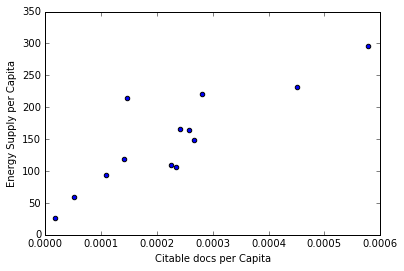

In [55]:
plot9()

### Question 10 (6.6%)
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [56]:
answer_one['HighRenew'] = 1*(answer_one['% Renewable'] > answer_one['% Renewable'].median())

In [57]:
answer_one['HighRenew']

Country
China                 1
Japan                 0
India                 0
Russian Federation    0
Germany               1
Canada                1
France                0
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int32

### Question 11 (6.6%)
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [58]:
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}

In [59]:
answer_one.columns

Index(['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', 'ratio',
       'population', 'Citable docs per Capita', 'PopEst', 'HighRenew'],
      dtype='object')

In [60]:
ans_elev = answer_one[['population']].copy()

In [61]:
ans_elev

,population
Country,
China,1.367645e+09
Japan,1.274094e+08
India,1.276731e+09
Russian Federation,1.435000e+08
Germany,8.036970e+07
Canada,3.523986e+07
France,6.383735e+07
South Korea,4.980543e+07
Italy,5.990826e+07


In [62]:
# create a dataframe with countries and continents
data = pd.DataFrame.from_dict(ContinentDict, orient='index')
data['Continent'] = data.index
data.columns = ['Continent', 'Country']
data.set_index('Country',drop=True, inplace = True)

In [63]:
answer_one = pd.merge(answer_one, data, left_index=True, right_index=True)

In [64]:
data = pd.merge(ans_elev, data, left_index=True, right_index=True)
data

,population,Continent
Country,,
Italy,5.990826e+07,Europe
Spain,4.644340e+07,Europe
China,1.367645e+09,Asia
Iran,7.707563e+07,Asia
India,1.276731e+09,Asia
Russian Federation,1.435000e+08,Europe
South Korea,4.980543e+07,Asia
Australia,2.331602e+07,Australia
Brazil,2.059153e+08,South America


In [65]:
data.pivot_table(index=['Continent'],values='population',aggfunc=('count', np.sum, np.mean,np.std)).reset_index()
#['size', 'sum', 'mean', 'std']
# std = 0 for only one value

,Continent,count,sum,mean,std
0,Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
1,Australia,1,2.331602e+07,2.331602e+07,NaN
2,Europe,5,3.940587e+08,7.881174e+07,3.813228e+07
3,North America,1,3.523986e+07,3.523986e+07,NaN
4,South America,1,2.059153e+08,2.059153e+08,NaN


In [66]:
def answer_eleven():
    ans_elev = answer_one[['population']]
    # create a dataframe with countries and continents
    data = pd.DataFrame.from_dict(ContinentDict, orient='index')
    data['Continent'] = data.index
    data.columns = ['Continent', 'Country']
    data.set_index('Country',drop=True, inplace = True)
    data = pd.merge(ans_elev, data, left_index=True, right_index=True)
    data = data.pivot_table(index=['Continent'],values='population',aggfunc=('count', np.sum, np.mean,np.std)).reset_index()
    #['size', 'sum', 'mean', 'std']
    # std = 0 for only one value
    return data

In [67]:
answer_eleven()

,Continent,count,sum,mean,std
0,Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
1,Australia,1,2.331602e+07,2.331602e+07,NaN
2,Europe,5,3.940587e+08,7.881174e+07,3.813228e+07
3,North America,1,3.523986e+07,3.523986e+07,NaN
4,South America,1,2.059153e+08,2.059153e+08,NaN


### Question 12 (6.6%)
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a __Series__ with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [68]:
bins = np.linspace(answer_one['% Renewable'].min(), answer_one['% Renewable'].max(),6)
bins[0] -=1
bins[-1] +=1

In [69]:
def process_renew(df):
    cut_points = list(bins)
    label_names = [1,2,3,4,5]
    df['bin'] = pd.cut(df['% Renewable'],cut_points,labels=label_names)
    return df

In [70]:
answer_one = process_renew(answer_one)
data = answer_one.copy()
data.reset_index(inplace = True)

In [71]:
# Make the Pivot table with Continent and bins which count a Country, also reset
data = data.pivot_table(index=['Continent','bin'],values='Country',aggfunc=('count'))

data = pd.DataFrame(data)
# delete groups with no countries
data.dropna(inplace = True)

In [72]:
def answer_twelve():
    global answer_one
    bins = np.linspace(answer_one['% Renewable'].min(), answer_one['% Renewable'].max(),6)
    bins[0] -=1
    bins[-1] +=1
    answer_one = process_renew(answer_one)
    data = answer_one.copy()
    data.reset_index(inplace = True)
    data = data.pivot_table(index=['Continent','bin'],values='Country',aggfunc=('count'))
    data = pd.DataFrame(data)
    # delete groups with no countries
    data.dropna(inplace = True)
    return data

In [73]:
answer_twelve()

Country
Continent     bin         
Asia          1        4.0
              2        1.0
Australia     1        1.0
Europe        2        3.0
              3        2.0
North America 5        1.0
South America 5        1.0

### Question 13 (6.6%)
Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.

e.g. 317615384.61538464 -> 317,615,384.61538464

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [74]:
answer_one.columns

Index(['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', 'ratio',
       'population', 'Citable docs per Capita', 'PopEst', 'HighRenew',
       'Continent', 'bin'],
      dtype='object')

In [75]:
answer_one['PopEst'] = answer_one['PopEst'].map('{:,.2f}'.format)
answer_one['PopEst'] = answer_one['PopEst'].astype('str')